In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

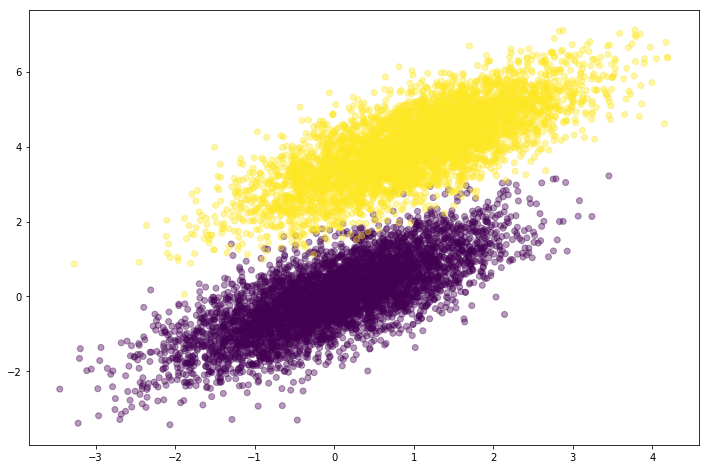

In [2]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

Picking a Link Function
Generalized linear models usually tranform a linear model of the predictors by using a link function. In logistic regression, the link function is the sigmoid. We can implement this really easily.

In [3]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

Logistic Regression from Scratch in Python
 5 minute read
In this post, I’m going to implement standard logistic regression from scratch. Logistic regression is a generalized linear model that we can use to model or predict categorical outcome variables. For example, we might use logistic regression to predict whether someone will be denied or approved for a loan, but probably not to predict the value of someone’s house.

So, how does it work? In logistic regression, we’re essentially trying to find the weights that maximize the likelihood of producing our given data and use them to categorize the response variable. Maximum Likelihood Estimation is a well covered topic in statistics courses (my Intro to Statistics professor has a straightforward, high-level description here), and it is extremely useful.

Since the likelihood maximization in logistic regression doesn’t have a closed form solution, I’ll solve the optimization problem with gradient ascent. Gradient ascent is the same as gradient descent, except I’m maximizing instead of minimizing a function. Before I do any of that, though, I need some data.

Generating Data
Like I did in my post on building neural networks from scratch, I’m going to use simulated data. I can easily simulate separable data by sampling from a multivariate normal distribution.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
Let’s see how it looks.

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)
png

Picking a Link Function
Generalized linear models usually tranform a linear model of the predictors by using a link function. In logistic regression, the link function is the sigmoid. We can implement this really easily.

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
Maximizing the Likelihood
To maximize the likelihood, I need equations for the likelihood and the gradient of the likelihood. Fortunately, the likelihood (for binary classification) can be reduced to a fairly intuitive form by switching to the log-likelihood. We’re able to do this without affecting the weights parameter estimation because log transformations are monotonic.


In [7]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

Building the Logistic Regression Function
Finally, I’m ready to build the model function. I’ll add in the option to calculate the model with an intercept, since it’s a good option to have.

In [12]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [ ]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.7067227680535
-142.9649362310784
-141.5453030715737
-141.06031965930796
-140.87031585891606
-140.7902591275381
-140.75505002269915
-140.73914503180956
-140.73183498915876
-140.72843666694828
-140.72684471255332
-140.72609508950472
-140.725740860523
-140.72557306887177
-140.72549345786172
-140.72545564250746
-140.72543766614328
-140.72542911609156
-140.72542504794774
-140.72542311181698
